# Diwali Sales Analysis
## Finding the insight from the given festival season sales data

In [3]:
# Importing the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the dataset and knowing about the data and the business findings.

In [4]:
# Importing the dataset in the form of pandas dataframe
df=pd.read_csv('A:\\DiwaliSalesAnalysis\\Data\\DiwaliSalesData.csv', encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Initiate EDA
### As it is clearly shown that there are two void columns, so we have to drop these columns as they cannot give us any information

In [5]:
# Dropping the null columns
df.drop(columns=['Status','unnamed1'], axis=1, inplace=True)

In [6]:
df.info() # Getting nformation about the data like non-null values, data types of the columns and all the column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [7]:
# Finding the null values column wise
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

### It shows that there are 12 null values in Amount column, lets get more information related to these values

In [8]:
# Getting the information about the null values of Amount.
df[df['Amount'].isnull()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [9]:
df['Amount'].mean() # Amount mean regardless of order counts


9453.610857727557

In [10]:
df[df['Orders']==1]['Amount'].mean() # Amount mean where Order count is 1

9562.648682336183

In [11]:
df[df['Orders']==2]['Amount'].mean() # Amount mean where Order count is 2

9468.704960248877

In [12]:
df[df['Orders']==3]['Amount'].mean() # Amount mean where Order count is 3

9401.823142857143

In [13]:
df[df['Orders']==4]['Amount'].mean() # Amount mean where Order count is 4

9379.087807428778

### Here null values in Amount column cannot be replaced by mean of any Amount even Order quantity wise, as the mean values are almost same and overall mean value is also same, so it is better to drop the 12 rows with null values in Amount column.

In [14]:
df.dropna(inplace=True) #Dropping the rows with null values

In [15]:
df.isnull().sum() #Verifying are the null values removed or not

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [16]:
# Checking for the duplicate values in the dataset
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0
8651,1000083,Gute,P00242842,M,26-35,35,0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345.0
8941,1001476,Anudeep,P00036842,M,18-25,25,0,Maharashtra,Western,IT Sector,Clothing & Apparel,4,5202.0
10571,1004404,Rittenbach,P00150142,F,26-35,28,1,Haryana,Northern,Aviation,Electronics & Gadgets,3,2304.0


### There are 8 duplicate rows in the dataset, we have to drop these rows and give our dataset a cleaned look.

In [17]:
df.drop_duplicates(keep='first', inplace=True) # dropping the duplicate rows and keeping the first row indexwise.

In [18]:
# Finding the unique values of every column in the dataset.
for i in df.columns:
    print(f'Column Name: {i} :', df[i].unique())
    print('*'*50)
    print('\n')

Column Name: User_ID : [1002903 1000732 1001990 ... 1001542 1004378 1005258]
**************************************************


Column Name: Cust_name : ['Sanskriti' 'Kartik' 'Bindu' ... 'Chris' 'Madan Mohan' 'Nicole']
**************************************************


Column Name: Product_ID : ['P00125942' 'P00110942' 'P00118542' ... 'P00307142' 'P00044742'
 'P00296942']
**************************************************


Column Name: Gender : ['F' 'M']
**************************************************


Column Name: Age Group : ['26-35' '0-17' '18-25' '51-55' '46-50' '55+' '36-45']
**************************************************


Column Name: Age : [28 35 16 25 26 34 20 24 29 54 19 46 30 53 83 33 40 39 32 36 55 27 72 45
 43 47 22 52 18 21 38 37 23 49 42 50 48 31 44 41 66 15 51 77 87 79 71 88
 58 82 62 92 12 63 17 13 67 90 56 75 81 64 73 84 14 76 86 89 68 61 91 85
 70 80 65 74 69 78 57 60 59]
**************************************************


Column Name: Marital_Status : 

In [ ]:
#Save the cleaned file into the Data Folder as Cleaned_Sales_Data
df.to_csv('A:\DiwaliSalesAnalysis\Data\Cleaned_Sales_Data')

### It is shown that the columns: Orders, Product category, Occupation, Zone, State, Age group and Gender have values with imited numbers and can be analysed easily according to them, remaining columns can be analysing by taking top N values of them.

### Lets find out the state wise top 10 total Amount spent by customers

In [19]:
state_sales=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
state_sales

,State,Amount
14,Uttar Pradesh,19346055.00
10,Maharashtra,14404467.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00
0,Andhra Pradesh,8037146.99
5,Himachal Pradesh,4963368.00
4,Haryana,4217871.00
1,Bihar,4014669.00
3,Gujarat,3938159.00


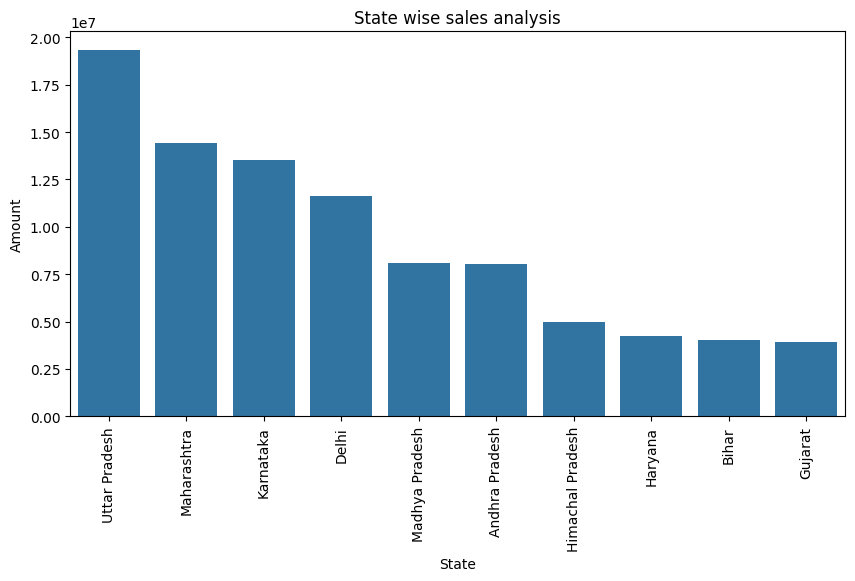

In [26]:
#statewise sales
plt.figure(figsize=(10,5))
plt.title("State wise sales analysis")
plt.xticks(rotation=90)
sns.barplot(data=state_sales, x='State', y='Amount')
#plt.tight_layout()
plt.show()

### It is clear that Uttar Pradesh is the highest spending state followed by Maharashtra followed by Karnataka and so on.

<Axes: xlabel='Product_Category', ylabel='Amount'>

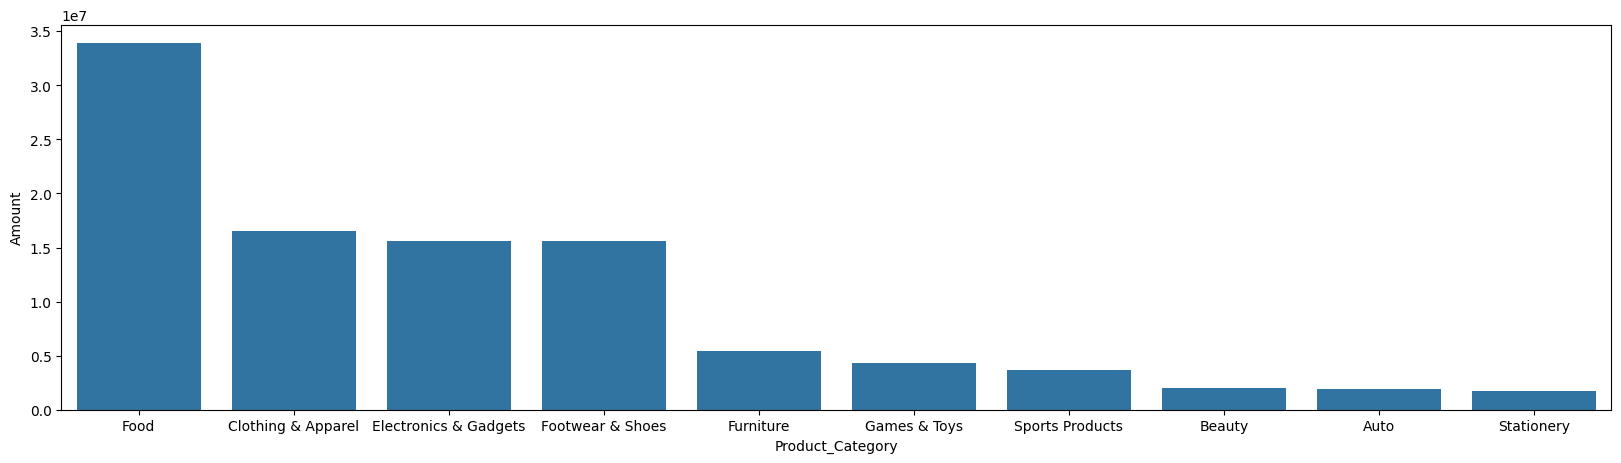

In [27]:
# Now finding the top 10 category sold in Diwali.
sales_category=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(20,5))
sns.barplot(data=sales_category, x='Product_Category',y='Amount')

### Checking the sales by gender and marital status as there are columns provided that tells information about the gender and marital status of the customer

<Axes: xlabel='Marital_Status', ylabel='Amount'>

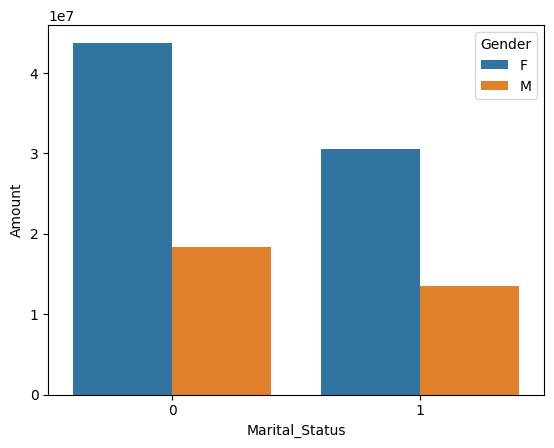

In [28]:
sales_by_gender_and_marital_status=df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=sales_by_gender_and_marital_status, x = 'Marital_Status',y='Amount', hue='Gender')

### It shows that both married and Unmarried females are purchasing more as compares to the males.

### But Unmarried females are spending more as compared to married females similar for males as 0 means unmarried and 1 means married.
### Now compare which age group is spending more amount.

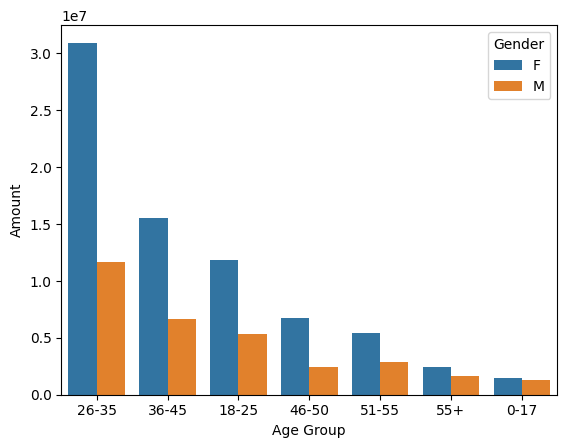

In [29]:
sales_by_age_group=df.groupby(['Age Group', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=sales_by_age_group, x='Age Group', y='Amount', hue='Gender')
plt.show()

### It shows that the females of age group of 26-35 spending

In [31]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

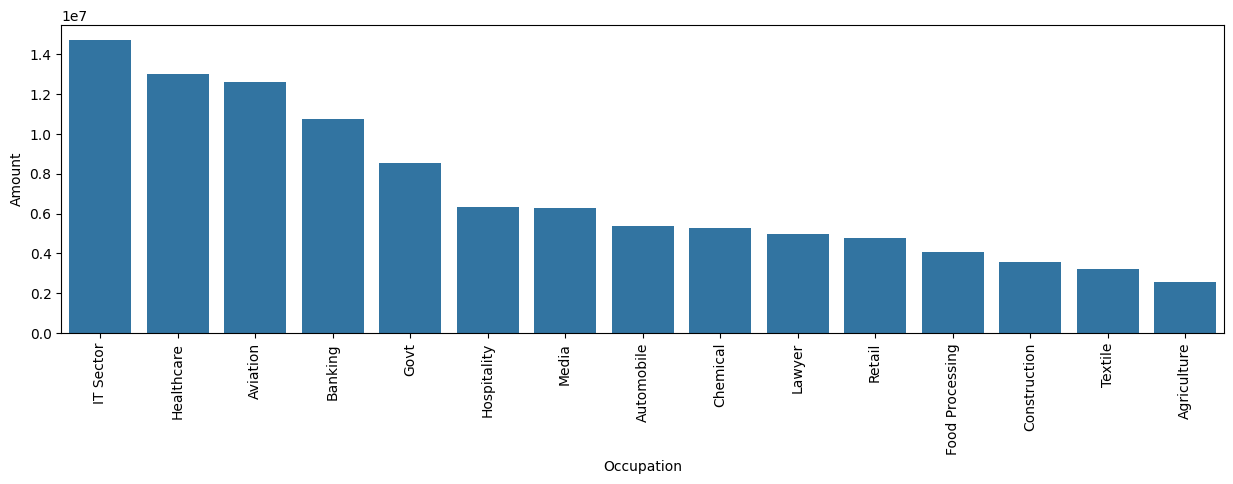

In [38]:
sales_by_Occupation=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
sns.barplot(data=sales_by_Occupation, x='Occupation', y='Amount')
plt.show()

### It shows that highest number of customers works in IT sector.

<Axes: xlabel='Product_ID', ylabel='Amount'>

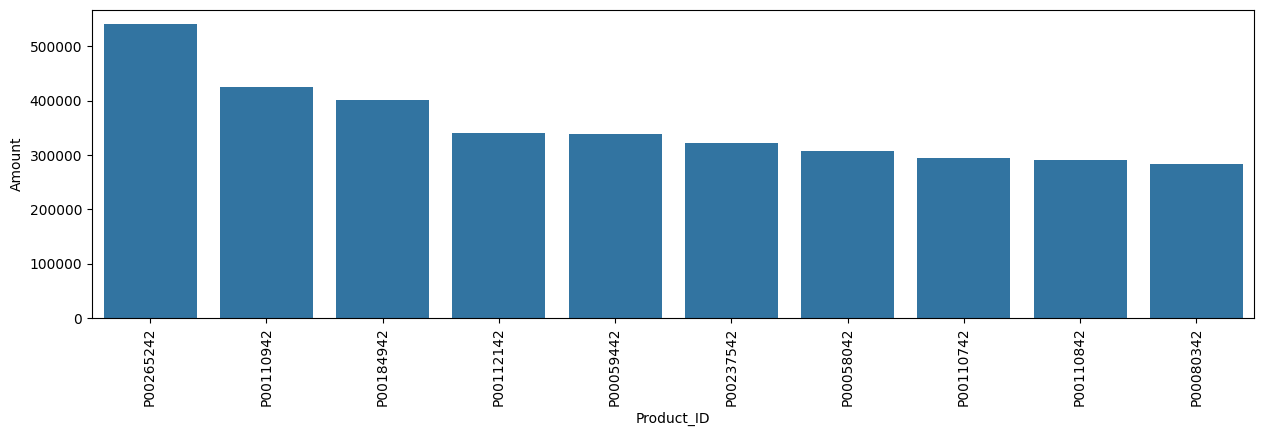

In [39]:
# Now Find the top 10 product ID on which most Amount is spent by customer.
Sales_by_Product_ID=df.groupby(['Product_ID'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
sns.barplot(data=Sales_by_Product_ID, x='Product_ID', y='Amount')

### These are the top 10 product categories

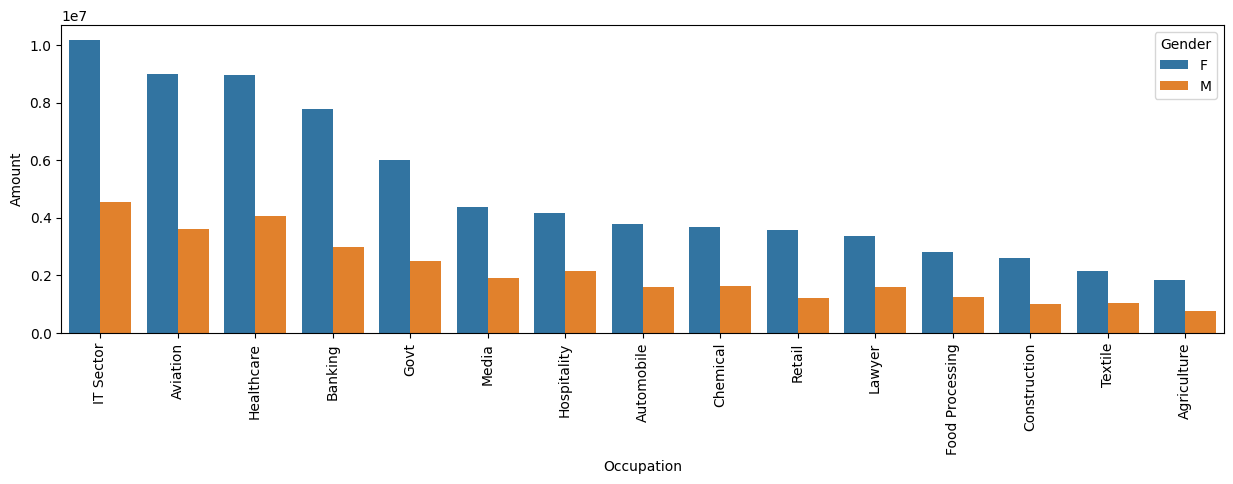

In [40]:
# Now find the sales by occupation and gender
sales_by_Occupation_and_Gender=df.groupby(['Occupation', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
sns.barplot(data=sales_by_Occupation_and_Gender, x='Occupation', y='Amount', hue='Gender')
plt.show()

### It is shown that in every sector females tends to spend more than males.

# Conclusion

## It can be concluded that during a festival in India, Unmarried females from Uttar Pradesh of age group 26-35 working in IT sector tends to spend more in Food, clothing, electronics and shoes and the most sold product is having product ID - P00265242.